# A STATISTICAL MODELLING OF A DISHWASHER CLEANING CYCLE TO DESIGN NEW CYCLES BY OPTIMIZATION.

## Codes of The Thesis by Korkut Anapa

## Prediction Model

This is a code to predict the CPI, DPI, EC, WC and T of the cleaning cycle of a DW.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

### preparing the data 

In [2]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_60.xlsx')

In [3]:
indvar=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [4]:
data=['CPI','DPI','EC','T','WC','1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [5]:
df=df_ref[data]

In [6]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,3.238150,86.705202,0.855000,225.000000,9.606667,0,24,21,4.0,2800,...,0,0,0,0,10,78,1,0,0,0
1,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
2,3.266000,83.230000,0.884200,240.000000,8.750000,0,21,18,4.0,3000,...,0,0,0,0,10,93,0,0,0,0
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


# check for duplicates

In [7]:
df=df.drop_duplicates(keep='last',subset=indvar)

In [8]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
5,3.270000,81.176000,0.570000,275.000000,9.480000,8,54,49,4.8,2800,...,0,0,0,0,30,80,1,38,0,0
6,3.300000,77.647000,0.580000,250.000000,9.410000,8,54,49,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
8,3.270000,82.824000,0.650000,250.000000,9.770000,8,55,49,7.1,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


In [9]:
y_CPI_ref = df['CPI']
y_DPI_ref = df['DPI']
y_EC_D_ref =df['EC']
y_T_D_ref =df['T']
y_WC_ref=df['WC']

In [10]:
y_CPI = df['CPI']
y_DPI = df['DPI']
y_EC_D=df['EC']
y_T_D=df['T']
y_WC=df['WC']

In [11]:
y_CPI.describe()

count    94.000000
mean      3.288865
std       0.246234
min       2.300000
25%       3.274000
50%       3.339861
75%       3.372941
max       3.580000
Name: CPI, dtype: float64

In [12]:
y_DPI.describe()

count    94.000000
mean     78.726037
std      16.186424
min      15.000000
25%      80.550595
50%      84.000000
75%      85.597737
max      91.666667
Name: DPI, dtype: float64

In [13]:
y_EC_D.describe()

count    94.000000
mean      0.879479
std       0.176616
min       0.500000
25%       0.770150
50%       0.856600
75%       1.012500
max       1.220000
Name: EC, dtype: float64

In [14]:
y_T_D.describe()

count     94.000000
mean     196.828723
std       73.080996
min       30.000000
25%      184.683333
50%      224.666667
75%      243.937500
max      297.000000
Name: T, dtype: float64

In [15]:
y_WC.describe()

count    94.000000
mean     10.905819
std       2.167230
min       6.793333
25%       9.500000
50%      10.396667
75%      11.582833
max      17.600000
Name: WC, dtype: float64

In [16]:
df

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
5,3.270000,81.176000,0.570000,275.000000,9.480000,8,54,49,4.8,2800,...,0,0,0,0,30,80,1,38,0,0
6,3.300000,77.647000,0.580000,250.000000,9.410000,8,54,49,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
8,3.270000,82.824000,0.650000,250.000000,9.770000,8,55,49,7.1,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


In [17]:
df_reference=df

In [18]:
df_reference

,CPI,DPI,EC,T,WC,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,3.220000,76.078000,0.500000,265.000000,10.000000,2,48,43,4.8,2800,...,0,0,0,0,50,57,1,30,0,0
4,3.280000,78.235000,0.590000,265.000000,9.200000,3,49,44,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
5,3.270000,81.176000,0.570000,275.000000,9.480000,8,54,49,4.8,2800,...,0,0,0,0,30,80,1,38,0,0
6,3.300000,77.647000,0.580000,250.000000,9.410000,8,54,49,4.8,2800,...,0,0,0,0,30,63,1,29,0,0
8,3.270000,82.824000,0.650000,250.000000,9.770000,8,55,49,7.1,2800,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.300662,84.105960,1.046000,226.000000,12.113333,0,23,20,4.6,2800,...,0,0,0,0,102,0,0,0,0,0
150,3.358667,87.000000,0.951622,220.000000,9.500000,0,19,16,4.0,2800,...,0,0,0,0,20,73,0,0,0,0
151,3.550000,80.000000,0.864750,210.000000,12.000000,0,8,6,3.5,2800,...,0,0,0,0,123,0,0,0,0,0
152,3.230864,86.316872,0.861667,227.666667,10.726667,0,19,16,4.0,2800,...,0,0,0,0,10,98,0,37,0,0


df_reference is created. This is very critical due to the fact that we use it as a starting point.

In [19]:
df=df_reference[indvar]

In [20]:
df

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of ZONE_C,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,0,...,0,0,0,0,50,57,1,30,0,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,0,...,0,0,0,0,30,80,1,38,0,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,102,0,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,20,73,0,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,123,0,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,10,98,0,37,0,0


## Variance Analysis

In [21]:
from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.1) #Removing both constant and quasi-constant
var_thr.fit(df)

var_thr.get_support()
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df_ver_1=df.drop(concol,axis=1)
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

In [22]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_1
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 47

Determinant: 0.0

Condition Number : 8.269090536881639e+21


In [23]:
df_ver_2=df_ver_1

In [24]:
correlation_matrix=df_ver_2.corr()
correlated_features = set()

In [25]:
threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

dataset 1 is df_ver_1 and dataset 2 is df_ver_3

In [26]:
df_ver_3 = df_ver_2.drop(labels=correlated_features, axis=1)
df_ver_3

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of kapalı,...,7SCD2Sum of ALT_C,7SCD2Sum of ÜST_C,8DSBSum of kapalı,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
3,2,48,43,4.8,2800,53,14.6,7.8,2,0,...,4.5,5.5,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,7.8,2,3,...,4.5,6.5,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,7.8,2,3,...,3.5,5.5,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,0.0,0,0,...,24.0,24.0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,3.8,0,0,...,12.0,8.0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,0.0,0,0,...,11.0,11.0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,4.0,0,0,...,8.0,7.0,0,0,109,10,98,0,37,0


In [27]:
df_ver_1

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of BEKLEME,...,8DSBSum of kapalı,8DSBSum of SURE,8DSBSum of CIRC_TIME,8DSBMax of DEVIR,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,2,...,0,0,0,0,110,50,57,1,30,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
5,8,54,49,4.8,2800,56,14.6,18.6,7.8,2,...,0,0,0,0,113,30,80,1,38,0
6,8,54,49,4.8,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
8,8,55,49,7.1,2800,55,14.6,18.6,7.8,2,...,0,0,0,0,96,30,63,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,103,102,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,94,20,73,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,124,123,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,109,10,98,0,37,0


In [28]:
df_ver_3.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '8DSBSum of kapalı', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')

In [29]:
df_ver_1.columns

Index(['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of kapalı', '2AYSum of SURE', '2AYSum of CIRC_TIME',
       '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '3MFTSum of WI', '4SGDSum of SURE', '4SGDSum of CIRC_TIME',
       '4SGDSum of WI', '4SGDMax of DEVIR', '4SGDSum of ALT_C',
       '4SGDSum of ÜST_C', '4SGDSum of TEPE_C', '4SGDSum of BEKLEME',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '7SCD2Sum of BEKLEME', '8DSBSum of kapalı', '8DSBSum of SURE',
       '8DSBSum of CIRC_TIME', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEK

the variables that are eliminated are 
1OYSumofÜST_C
2AYSumofÜST_C
3MFTSumofWI
7SCD2SumofWI
7SCD2SumofBEKLEME
8DSBSumofCIRC_TIME
2AYSumofCIRC_TIME
4SGDSumofCIRC_TIME
4SGDSumofBEKLEME
7SCD2SumofCIRC_TIME
7SCD2SumofTEPE_C
8DSBSumofSURE

In [30]:
# Analysis of a Matrix 
# input matrix name
matrix_name= df_ver_3
X_matrix = matrix_name.to_numpy()
rank = np.linalg.matrix_rank(X_matrix)
print("\nRank:", rank)
XMT=np.transpose(X_matrix)
XTX=np.dot(XMT,X_matrix)
det = np.linalg.det(XTX)
print("\nDeterminant:", det)
Co=np.linalg.cond(X_matrix)
print("\nCondition Number :", Co)


Rank: 37

Determinant: 6.136095300990972e+107

Condition Number : 114393.38196482802


In [31]:
outputs = [ y_CPI, y_DPI , y_EC_D, y_T_D, y_WC]
for x in outputs:
    model_LR_1 = LinearRegression()
    model_LR_1.fit(df_ver_1, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_LR_1,df_ver_1, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR_1,df_ver_1, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.28 -862
 14.25 -1342
 0.16 -638
 10.38 85
 1.39 -119


In [32]:
outputs = [ y_CPI, y_DPI , y_EC_D, y_T_D, y_WC]
for x in outputs:
    model_LR = LinearRegression()
    model_LR.fit(df_ver_3, x)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_LR,df_ver_3, x, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_LR,df_ver_3, x, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.2f %.0f' % (-mean(scores1),  100*mean(scores3) ))

 0.13 -41
 8.58 -155
 0.07 61
 6.43 97
 0.73 42


This is the improvement of colinearity problem

In [32]:
import joblib

In [33]:
import joblib
filename = 'dataset1_LR.sav'
joblib.dump(model_LR, filename)

['dataset1_LR.sav']

# Feature Selection Codes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

## Feature Selection by Select k Best with Linear Regression 

### CPI

In [349]:
outputs = [ y_CPI, y_DPI , y_EC_D, y_T_D, y_WC]
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)


Text(0, 0.5, 'MAE')

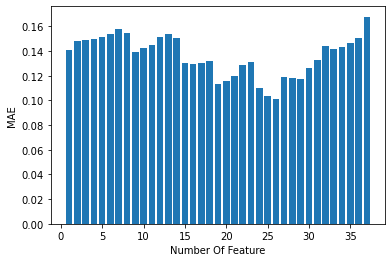

In [286]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')       

Text(0, 0.5, 'R2')

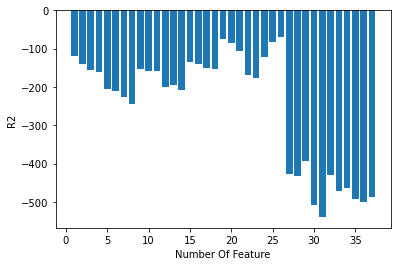

In [287]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [288]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=26)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))


 0.101 -69.545


### DPI

In [289]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

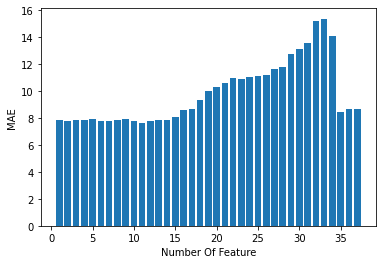

In [290]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

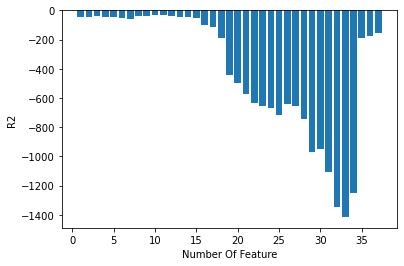

In [291]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [292]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=10)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))


 7.772 -32.460


### EC

In [264]:
X=df_ver_3
y=y_EC_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

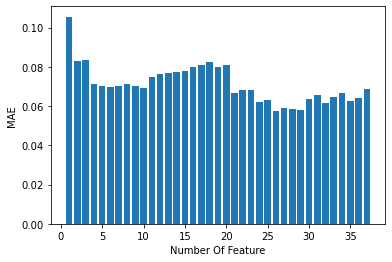

In [265]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

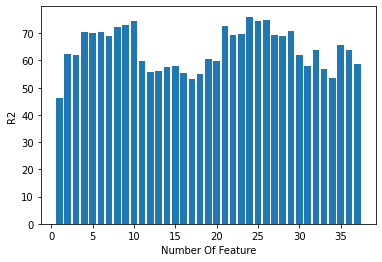

In [266]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [269]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=29)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.058 70.768


### WC

In [270]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

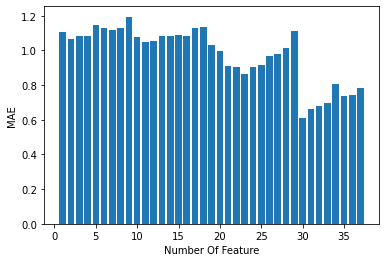

In [271]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

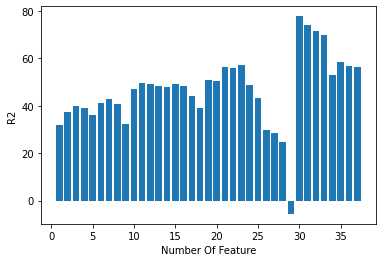

In [272]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [273]:
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=30)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.608 77.655


### T

In [274]:
X=df_ver_3
y=y_T_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import SelectKBest, f_regression
        #Select top 2 features based on mutual info regression
        selector = SelectKBest(f_regression, k=k)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

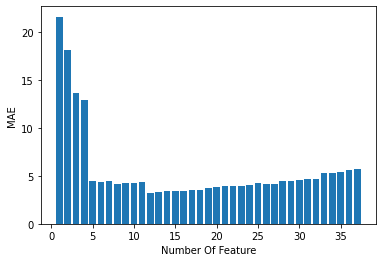

In [275]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

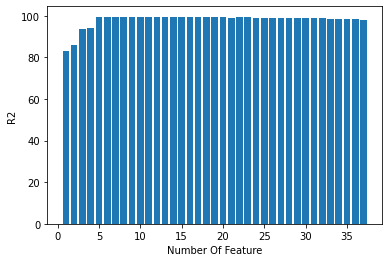

In [276]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [277]:
        from sklearn.feature_selection import SelectKBest, f_regression
        selector = SelectKBest(f_regression, k=11)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 4.351 99.351


## Feature Selection by Recursive Feature Elimination with Linear Regression 

### CPI

In [278]:
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=LinearRegression(),n_features_to_select = k, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]        
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

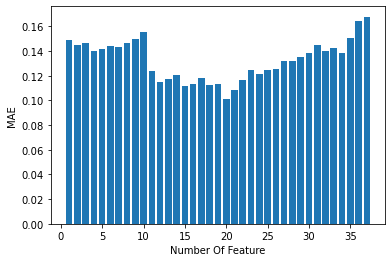

In [279]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE')  

Text(0, 0.5, 'R2')

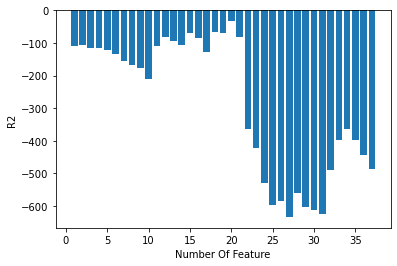

In [280]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [281]:
        selector = RFE(estimator=LinearRegression(),n_features_to_select = 20, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]    
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.101 -33.738


### DPI

In [293]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=LinearRegression(),n_features_to_select = k, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]        
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

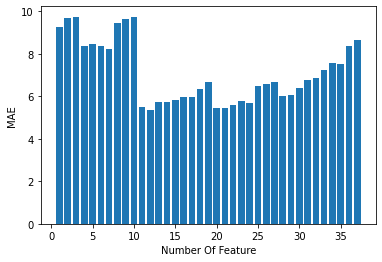

In [294]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

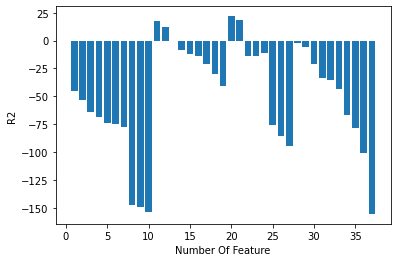

In [295]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [296]:
        selector = RFE(estimator=LinearRegression(),n_features_to_select = 11, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]    
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 5.480 17.950


### EC

In [297]:
X=df_ver_3
y=y_EC_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=LinearRegression(),n_features_to_select = k, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]        
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

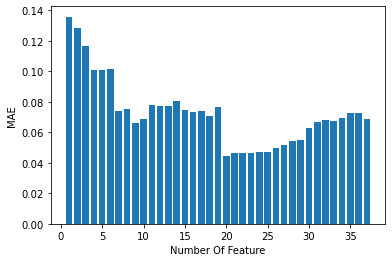

In [298]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

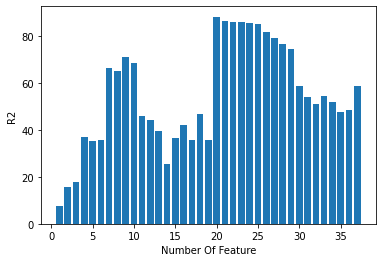

In [299]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [300]:
        selector = RFE(estimator=LinearRegression(),n_features_to_select = 20, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]    
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.045 88.191


### T

In [301]:
X=df_ver_3
y=y_T_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=LinearRegression(),n_features_to_select = k, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]        
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

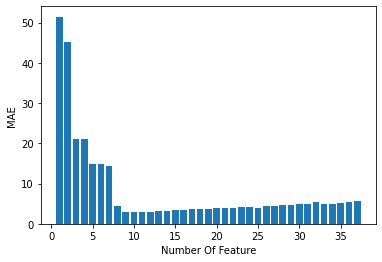

In [302]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

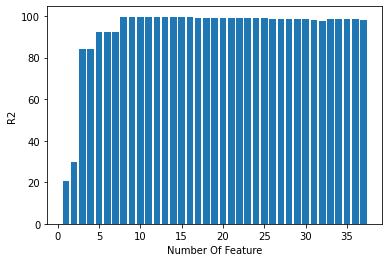

In [303]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [304]:
        selector = RFE(estimator=LinearRegression(),n_features_to_select = 9, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]    
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 2.971 99.635


### WC

In [305]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 38, 1):
        from sklearn.feature_selection import RFE
        selector = RFE(estimator=LinearRegression(),n_features_to_select = k, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]        
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

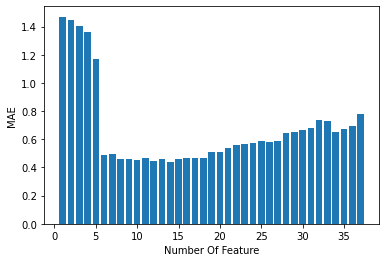

In [306]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

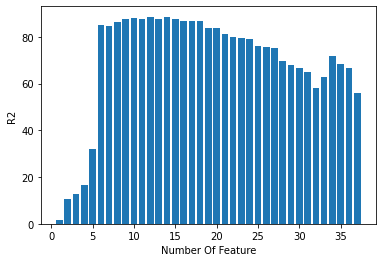

In [307]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [308]:
        selector = RFE(estimator=LinearRegression(),n_features_to_select = 6, step = 1)
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]    
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.491 84.866


We can define T by Linear Regression with 10 feature 
WC by LR with 10 feature 
EC by LR with 20 feature 

## Feature Selection by Genetic Selection with Linear Regression 

### CPI

In [168]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

X = df_ver_3
y = y_CPI
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of CIRC_TIME', '1OYSum of WI', '1OYMax of DEVIR',
       '1OYMax of TEMP', '1OYSum of TEPE_C', '2AYSum of kapalı',
       '2AYMax of DEVIR', '2AYMax of TEMP', '4SGDSum of WI',
       '4SGDSum of ÜST_C', '7SCD2Sum of kapalı', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '10KUSum of SURE', '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE'],
      dtype='object')
 0.078 20.293


### DPI

In [169]:
X = df_ver_3
y = y_DPI
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYSum of WI', '1OYMax of TEMP',
       '1OYSum of TEPE_C', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYMax of TEMP', '2AYSum of ALT_C', '2AYSum of TEPE_C',
       '4SGDSum of SURE', '7SCD2Sum of kapalı', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE',
       '10KUSum of GAUDI_offset'],
      dtype='object')
 4.513 43.148


### EC

In [170]:
X = df_ver_3
y = y_EC_D
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of CIRC_TIME', '1OYMax of DEVIR', '2AYSum of kapalı',
       '2AYMax of TEMP', '2AYSum of ALT_C', '3MFTSum of SURE', '4SGDSum of WI',
       '7SCD2Sum of kapalı', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE'],
      dtype='object')
 0.047 87.249


### WC

In [171]:
X = df_ver_3
y = y_WC
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYSum of TEPE_C', '4SGDSum of WI',
       '4SGDSum of TEPE_C', '7SCD2Sum of kapalı', '7SCD2Sum of SURE',
       '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '8DSBSum of kapalı'],
      dtype='object')
 0.391 90.278


### T

In [172]:
X = df_ver_3
y = y_T_D
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_LR=LinearRegression()
model_LR.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_LR,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_LR,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of SURE', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYSum of TEPE_C', '4SGDSum of WI', '4SGDSum of ALT_C',
       '7SCD2Sum of SURE', '8DSBMax of DEVIR', '10KUSum of BEKLEME',
       '10KUSum of FAN', '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')
 2.924 99.618


Genetic Algorithm Performs Better on feature selection for linear regression models. this improve the importance of feature selection

## Feature Selection by  Shrinkage Methods

### CPI

In [317]:
y=y_CPI
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 0.139 7.585
>Lasso 0.143 13.528
>Lasso 0.120 34.946
>Lasso 0.114 25.555
>Ridge 0.115 28.429
>Ridge 0.120 32.897
>Ridge 0.143 14.837
>Ridge 0.169 -45.100
>ElasticNet 0.139 10.114
>ElasticNet 0.137 5.836
>ElasticNet 0.139 5.974
>ElasticNet 0.122 36.597
>ElasticNet 0.144 13.389
>ElasticNet 0.144 13.675
>ElasticNet 0.123 24.200
>ElasticNet 0.119 34.285
>ElasticNet 0.120 35.929
>ElasticNet 0.107 43.904
>ElasticNet 0.105 36.216
>ElasticNet 0.109 26.173


### DPI

In [318]:
y=y_DPI
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 8.208 36.187
>Lasso 8.370 12.938
>Lasso 6.365 40.525
>Lasso 7.440 35.553
>Ridge 7.507 14.553
>Ridge 7.126 29.635
>Ridge 8.107 15.004
>Ridge 10.146 -98.706
>ElasticNet 8.079 35.352
>ElasticNet 8.093 35.612
>ElasticNet 8.175 35.714
>ElasticNet 8.234 12.992
>ElasticNet 8.269 13.104
>ElasticNet 8.320 12.294
>ElasticNet 7.377 18.191
>ElasticNet 7.152 23.574
>ElasticNet 6.861 29.535
>ElasticNet 7.005 33.353
>ElasticNet 6.992 35.583
>ElasticNet 7.060 35.941


### EC

In [319]:
y=y_EC_D
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 0.127 12.369
>Lasso 0.135 -30.268
>Lasso 0.077 63.007
>Lasso 0.069 55.429
>Ridge 0.060 62.635
>Ridge 0.055 73.443
>Ridge 0.063 63.016
>Ridge 0.077 17.865
>ElasticNet 0.132 -23.129
>ElasticNet 0.128 0.638
>ElasticNet 0.127 7.679
>ElasticNet 0.089 43.593
>ElasticNet 0.131 -20.601
>ElasticNet 0.134 -26.952
>ElasticNet 0.073 62.087
>ElasticNet 0.074 66.816
>ElasticNet 0.075 65.160
>ElasticNet 0.061 65.929
>ElasticNet 0.067 58.135
>ElasticNet 0.068 56.063


### WC

In [320]:
y=y_WC
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 1.292 -51.449
>Lasso 1.010 23.500
>Lasso 0.738 71.467
>Lasso 0.514 86.479
>Ridge 0.686 77.346
>Ridge 0.563 83.184
>Ridge 0.624 74.949
>Ridge 0.714 32.642
>ElasticNet 1.146 -30.254
>ElasticNet 1.264 -55.674
>ElasticNet 1.286 -52.644
>ElasticNet 0.865 55.501
>ElasticNet 0.954 41.389
>ElasticNet 0.982 31.652
>ElasticNet 0.682 78.657
>ElasticNet 0.723 75.238
>ElasticNet 0.729 73.376
>ElasticNet 0.544 85.545
>ElasticNet 0.526 86.476
>ElasticNet 0.520 86.503


### T

In [321]:
y=y_T_D
X=df_ver_3
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Lasso'] = Lasso(alpha=alp, fit_intercept=True, normalize='deprecated',
                                      precompute=False, copy_X=True, max_iter=10000, tol=0.01,
                                      warm_start=False, positive=False, random_state=None, selection='cyclic')

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
for alp in [10,1,0.1,0.01]:
        def get_models():
            models = dict()
            models['Ridge'] = Ridge(alpha=alp, fit_intercept=True, normalize='deprecated', 
                                    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
                
                
for alp in [10,1,0.1,0.01]:
    for l1 in [0.2,0.6,0.8]:    
        def get_models():
            models = dict()
            models['ElasticNet'] = ElasticNet(alpha=alp, l1_ratio=l1, fit_intercept=True,
                                                 normalize='deprecated', precompute=False, max_iter=10000, 
                                                 copy_X=True, tol=0.01, warm_start=False, positive=False,
                                                 random_state=None, selection='cyclic')
            return models

        def evaluate_model(model, X, y):
            cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
            scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
            return scores

        def evaluate_model2(model, X, y):
            cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
            scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
            return scores2

        models = get_models()
        results, names = list(), list()
        for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))
   

>Lasso 5.044 98.136
>Lasso 4.039 99.203
>Lasso 4.555 98.762
>Lasso 5.226 97.103
>Ridge 4.037 99.227
>Ridge 4.756 98.944
>Ridge 5.752 98.094
>Ridge 6.473 96.268
>ElasticNet 4.434 98.678
>ElasticNet 4.724 98.389
>ElasticNet 4.870 98.233
>ElasticNet 4.242 99.164
>ElasticNet 4.176 99.225
>ElasticNet 3.976 99.191
>ElasticNet 4.249 98.788
>ElasticNet 4.302 98.708
>ElasticNet 4.365 98.711
>ElasticNet 4.855 97.858
>ElasticNet 5.021 97.398
>ElasticNet 4.994 97.248


## Feature Selection by Sequential Backward or Forward Methods with Linear Regression

In [322]:
from sklearn.feature_selection import SequentialFeatureSelector

### BACKWARD

### CPI

In [324]:
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

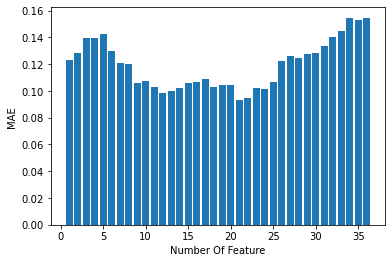

In [325]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

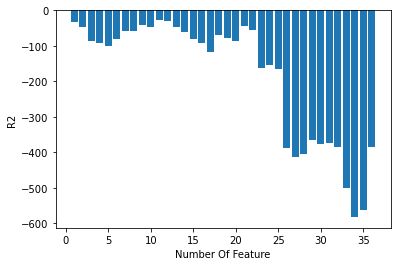

In [326]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [328]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 21, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.093 -43.274


### DPI

In [329]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

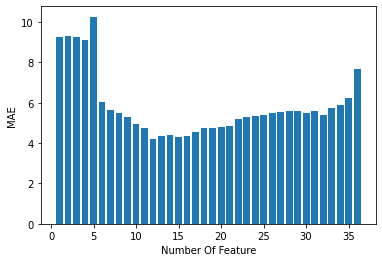

In [330]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

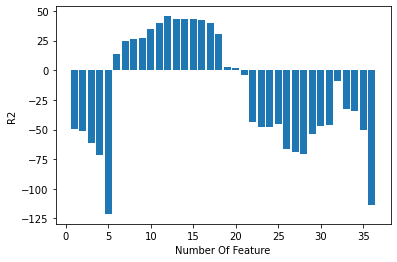

In [331]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [332]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 11, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 4.749 40.189


### EC

In [333]:
X=df_ver_3
y=y_EC_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

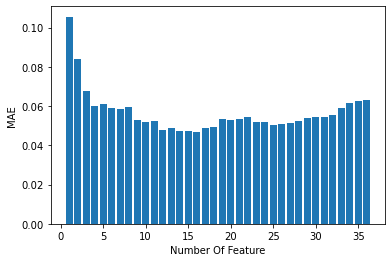

In [334]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

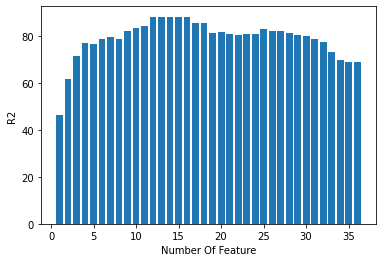

In [335]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [336]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 15, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.047 88.214


### WC

In [341]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

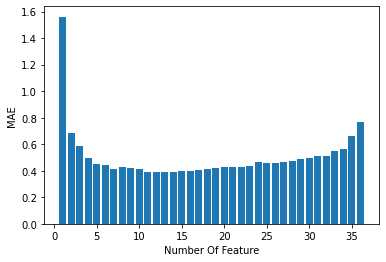

In [342]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

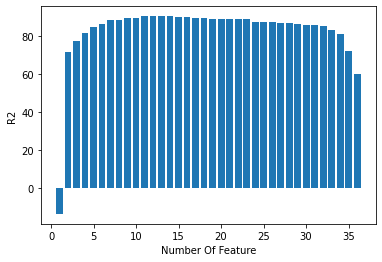

In [343]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [344]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 10, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.416 89.226


### T

In [345]:
X=df_ver_3
y=y_T_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

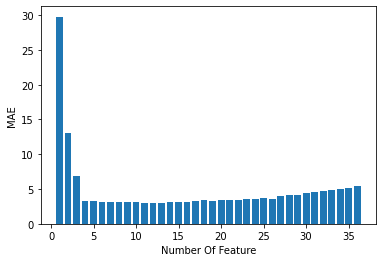

In [346]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

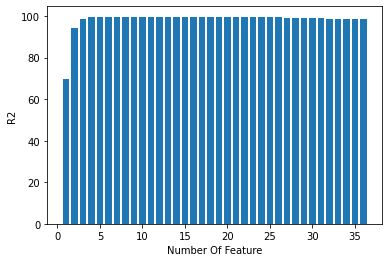

In [347]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [348]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 5, cv =3, direction ='backward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 3.256 99.530


### FORWARD

### CPI

In [353]:
X=df_ver_3
y=y_CPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

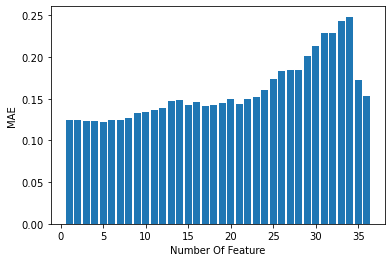

In [351]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

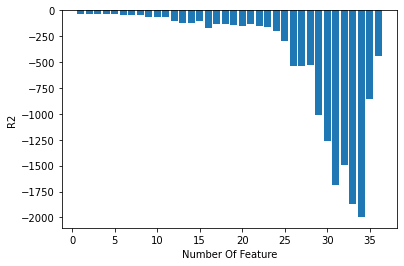

In [352]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [354]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 5, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.123 -37.211


### DPI

In [355]:
X=df_ver_3
y=y_DPI
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

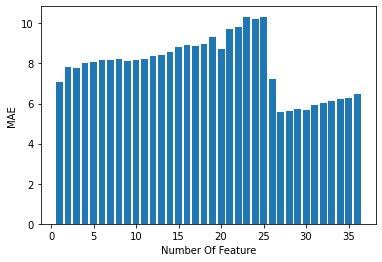

In [356]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

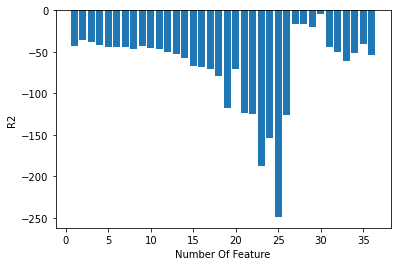

In [357]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [358]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 27, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 5.581 -16.338


### EC

In [359]:
X=df_ver_3
y=y_EC_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

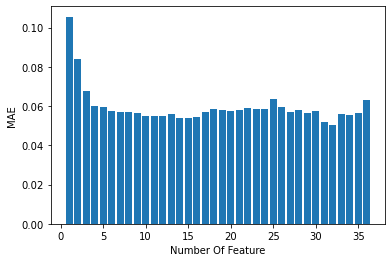

In [360]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

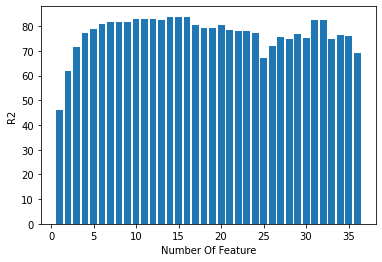

In [361]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [362]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 12, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.055 82.954


### WC

In [363]:
X=df_ver_3
y=y_WC
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

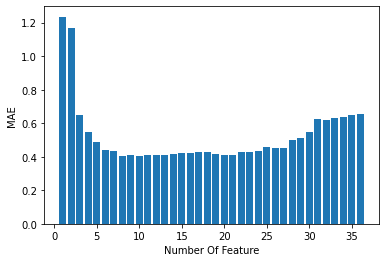

In [364]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

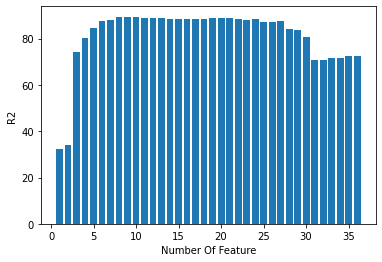

In [365]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [366]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 10, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 0.405 89.289


### T

In [367]:
X=df_ver_3
y=y_T_D
model = LinearRegression()
apt= pd.DataFrame(columns={'feature','mae','r2'})
for k  in range(1, 37, 1):
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = k, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy()       
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        apt=apt.append({'mae':-1*(mean(scores1)),'r2':100*(mean(scores3)),'feature':k},ignore_index=True)

Text(0, 0.5, 'MAE')

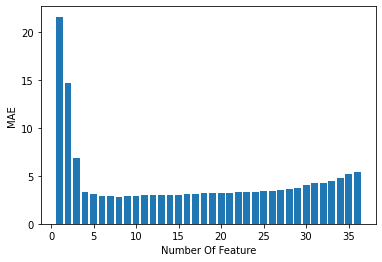

In [368]:
        plt.bar(apt.feature,apt.mae)
        plt.xlabel('Number Of Feature')
        plt.ylabel('MAE') 

Text(0, 0.5, 'R2')

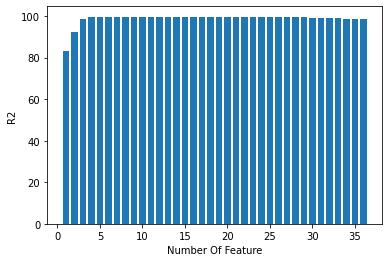

In [369]:
        plt.bar(apt.feature,apt.r2)
        plt.xlabel('Number Of Feature')
        plt.ylabel('R2')

In [370]:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select = 5, cv =3, direction ='forward')
        selector.fit(X, y)
        selected_columns=X.columns[selector.get_support()]     
        XX = X[selected_columns].copy() 
        model.fit(XX, y)
        cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
        scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
        scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
        print(' %.3f %.3f' % (-mean(scores1), 100*mean(scores3)))

 3.155 99.570


# NON LINEARITY PROBLEM 

### CPI

In [233]:
non_linear_models = [
CatBoostRegressor(iterations=5,learning_rate=1,depth=9),
GradientBoostingRegressor(random_state=0),
RandomForestRegressor(n_estimators = 10, random_state = 0),
DecisionTreeRegressor(random_state = 0),
KNeighborsRegressor(n_neighbors=3),
XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
]
X = df_ver_3
y = y_CPI
for xxx in non_linear_models:
    estimator = xxx
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
    model = model.fit(X, y)
    print('Features:', X.columns[model.support_])
    selected_columns=X.columns[model.support_]       
    XX = X[selected_columns].copy() 
    model_Reg=xxx
    model_Reg.fit(XX, y)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_Reg,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_Reg,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

0:	learn: 0.1112820	total: 178ms	remaining: 711ms
1:	learn: 0.0708867	total: 181ms	remaining: 272ms
2:	learn: 0.0561567	total: 184ms	remaining: 123ms
3:	learn: 0.0489623	total: 187ms	remaining: 46.8ms
4:	learn: 0.0439949	total: 190ms	remaining: 0us
Features: Index(['1OYSum of CIRC_TIME', '1OYMax of DEVIR', '1OYMax of TEMP',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of TEPE_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDSum of ÜST_C',
       '7SCD2Sum of kapalı', '7SCD2Max of TEMP', '8DSBMax of DEVIR',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of GAUDI_offset'],
      dtype='object')
0:	learn: 0.1112820	total: 1.23ms	remaining: 4.94ms
1:	learn: 0.0708867	total: 5.52ms	remaining: 8.29ms
2:	learn: 0.0561567	total: 8.75ms	remaining: 5.83ms
3:	learn: 0.0489623	total: 12.2ms	remaining: 3.04ms
4:	learn: 0.0439949	total: 15.3ms	remaining: 0us
 0.058

### DPI

In [234]:
non_linear_models = [
CatBoostRegressor(iterations=5,learning_rate=1,depth=9),
GradientBoostingRegressor(random_state=0),
RandomForestRegressor(n_estimators = 10, random_state = 0),
DecisionTreeRegressor(random_state = 0),
KNeighborsRegressor(n_neighbors=3),
XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
]
X = df_ver_3
y = y_DPI
for xxx in non_linear_models:
    estimator = xxx
    model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
    model = model.fit(X, y)
    print('Features:', X.columns[model.support_])
    selected_columns=X.columns[model.support_]       
    XX = X[selected_columns].copy() 
    model_Reg=xxx
    model_Reg.fit(XX, y)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model_Reg,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model_Reg,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

0:	learn: 6.7683167	total: 674us	remaining: 2.7ms
1:	learn: 3.4871499	total: 3.07ms	remaining: 4.6ms
2:	learn: 2.7132772	total: 5.01ms	remaining: 3.34ms
3:	learn: 2.2382849	total: 7.89ms	remaining: 1.97ms
4:	learn: 2.0688585	total: 8.91ms	remaining: 0us
Features: Index(['1OYSum of SURE', '1OYSum of WI', '1OYSum of TEPE_C', '2AYMax of TEMP',
       '2AYSum of ALT_C', '3MFTSum of SURE', '7SCD2Sum of kapalı',
       '7SCD2Max of DEVIR', '7SCD2Max of TEMP', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of KAPI ACMA',
       '10KUSum of GAUDI_offset'],
      dtype='object')
0:	learn: 6.7683167	total: 845us	remaining: 3.38ms
1:	learn: 3.4871499	total: 4.73ms	remaining: 7.1ms
2:	learn: 2.7132772	total: 7.45ms	remaining: 4.96ms
3:	learn: 2.2382849	total: 12.2ms	remaining: 3.06ms
4:	learn: 2.0688585	total: 13.6ms	remaining: 0us
 3.263 72.418
Features: Index(['1OYMax of TEMP', '2AYMax of DEVIR', '2AYSum of ALT_C',
       '7SCD2Sum of kapalı', '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C',


### CPI all features

In [238]:
y=y_CPI
X=df_ver_3

def get_models():
	models = dict()
	models['GBR'] = GradientBoostingRegressor(random_state=0)
	models['RFR'] = RandomForestRegressor(n_estimators = 100, random_state = 0)
	models['KNN']= KNeighborsRegressor(n_neighbors=3)
	models['KNN2']= KNeighborsRegressor(n_neighbors=5)
	models['XGB']= XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
	return models

def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_model2(model, X, y):
	cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores2

models = get_models()
results, names = list(), list()
for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))


>GBR 0.059 81.939
>RFR 0.062 79.786
>KNN 0.095 33.864
>KNN2 0.114 20.445
>XGB 0.052 81.740


### DPI all features

In [239]:
y=y_DPI
X=df_ver_3

def get_models():
	models = dict()
	models['GBR'] = GradientBoostingRegressor(random_state=0)
	models['RFR'] = RandomForestRegressor(n_estimators = 100, random_state = 0)
	models['KNN']= KNeighborsRegressor(n_neighbors=3)
	models['KNN2']= KNeighborsRegressor(n_neighbors=5)
	models['XGB']= XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
	return models

def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_model2(model, X, y):
	cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
	scores2 = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores2

models = get_models()
results, names = list(), list()
for name, model in models.items():
                scores = evaluate_model(model, X, y)
                scores2 = evaluate_model2(model, X, y)
                results.append(scores)
                names.append(name)
                print('>%s %.3f %.3f' % (name, -mean(scores), 100*mean(scores2)))


>GBR 2.843 85.001
>RFR 3.121 83.977
>KNN 4.626 56.437
>KNN2 5.769 42.969
>XGB 2.491 88.058


GBR and XGB are good look with feature selection rather than genetic
   

# MODEL SELECTION 

### VERIFICATION  of MODEL

In [33]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [34]:
df_test = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_60.xlsx')

### MODEL OF CPI

In [38]:
X = df_ver_3
y = y_CPI
variable=df_test['CPI']
estimator = GradientBoostingRegressor(random_state=0)
model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_Reg_CPI=GradientBoostingRegressor(random_state=0)
model_Reg_CPI.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_Reg_CPI,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_Reg_CPI,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYMax of DEVIR', '2AYMax of DEVIR',
       '2AYSum of ALT_C', '4SGDSum of ALT_C', '7SCD2Max of DEVIR',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA'],
      dtype='object')
 0.046 63.071


In [65]:
XX_CPI=['1OYSum of kapalı', '1OYMax of DEVIR', '2AYMax of DEVIR',
       '2AYSum of ALT_C', '4SGDSum of ALT_C', '7SCD2Max of DEVIR',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA']
XX_DPI=['1OYMax of TEMP', '1OYSum of BEKLEME', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '4SGDSum of TEPE_C', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of GAUDI_offset']

Result (Test)
MAE : 0.03421


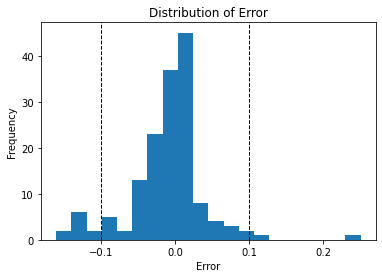

-0.008636363636363638
Statistic: 4.786
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)


In [39]:
model=model_Reg_CPI
df_test_ref=df_test[XX.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# normality test
result = anderson(result['Error'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [40]:
X = df_ver_3
y = y_DPI
estimator = GradientBoostingRegressor(random_state=0)
model = GeneticSelectionCV(
        estimator, cv=5, verbose=0,
        scoring="neg_mean_absolute_error", max_features=37,
        n_population=100, crossover_proba=0.5,
        mutation_proba=0.2, n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.04,
        tournament_size=3, n_gen_no_change=10,
        caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_Reg_DPI=GradientBoostingRegressor(random_state=0)
model_Reg_DPI.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_Reg_DPI,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_Reg_DPI,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYMax of TEMP', '1OYSum of BEKLEME', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '4SGDSum of TEPE_C', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of GAUDI_offset'],
      dtype='object')
 2.108 83.635


In [66]:
XX_DPI=['1OYMax of TEMP', '1OYSum of BEKLEME', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '4SGDSum of TEPE_C', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of GAUDI_offset']

Result (Test)
MAE : 1.41107


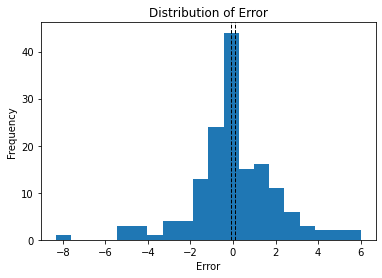

0.07201298701298693
Statistic: 2.665
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)


In [41]:
variable=df_test['DPI']
model=model_Reg_DPI
df_test_ref=df_test[XX.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# normality test
result = anderson(result['Error'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [42]:
X = df_ver_3
y = y_EC_D
variable=df_test['EC']
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_Reg_EC=LinearRegression()
model_Reg_EC.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_Reg_EC,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_Reg_EC,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of CIRC_TIME', '1OYMax of DEVIR', '2AYSum of kapalı',
       '2AYMax of TEMP', '2AYSum of ALT_C', '3MFTSum of SURE', '4SGDSum of WI',
       '7SCD2Sum of kapalı', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE'],
      dtype='object')
 0.048 86.628


In [67]:
XX_EC=['1OYSum of CIRC_TIME', '1OYMax of DEVIR', '2AYSum of kapalı',
       '2AYMax of TEMP', '2AYSum of ALT_C', '3MFTSum of SURE', '4SGDSum of WI',
       '7SCD2Sum of kapalı', '7SCD2Max of TEMP', '7SCD2Sum of ALT_C',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE']

Result (Test)
MAE : 0.03486


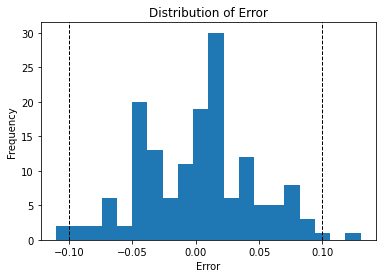

0.0014285714285714281
Statistic: 0.589
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data looks normal (fail to reject H0)
5.000: 0.768, data looks normal (fail to reject H0)
2.500: 0.896, data looks normal (fail to reject H0)
1.000: 1.065, data looks normal (fail to reject H0)


In [43]:
model=model_Reg_EC
df_test_ref=df_test[XX.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# normality test
result = anderson(result['Error'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [44]:
X = df_ver_3
y = y_T_D
variable=df_test['T']
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_Reg_T=LinearRegression()
model_Reg_T.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_Reg_T,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_Reg_T,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of SURE', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '4SGDSum of WI',
       '4SGDSum of ALT_C', '7SCD2Sum of SURE', '8DSBMax of DEVIR',
       '10KUSum of SURE', '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset'],
      dtype='object')
 3.110 99.542


In [37]:
XX_T=['1OYSum of SURE', '2AYSum of kapalı', '2AYSum of SURE',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '4SGDSum of WI',
       '4SGDSum of ALT_C', '7SCD2Sum of SURE', '8DSBMax of DEVIR',
       '10KUSum of SURE', '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset']

Result (Test)
MAE : 2.96675


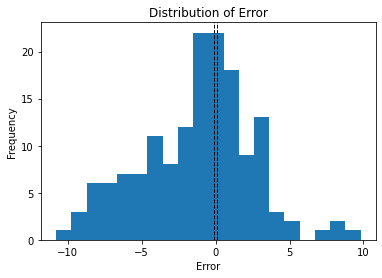

-1.2181818181818167
Statistic: 1.233
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)


In [45]:
model=model_Reg_T
df_test_ref=df_test[XX.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# normality test
result = anderson(result['Error'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [32]:
X = df_ver_3
y = y_WC
variable=df_test['WC']
estimator = LinearRegression()
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="neg_mean_absolute_error", max_features=37,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X, y)
print('Features:', X.columns[model.support_])
selected_columns=X.columns[model.support_]       
XX = X[selected_columns].copy() 
model_Reg_WC=LinearRegression()
model_Reg_WC.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model_Reg_WC,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_Reg_WC,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

Features: Index(['1OYSum of kapalı', '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP',
       '2AYSum of kapalı', '2AYSum of WI', '2AYMax of TEMP', '2AYSum of ALT_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C',
       '7SCD2Sum of ÜST_C', '8DSBSum of kapalı', '8DSBMax of DEVIR',
       '10KUSum of SURE'],
      dtype='object')
 0.388 89.889


In [38]:
XX_WC=['1OYSum of kapalı', '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP',
       '2AYSum of kapalı', '2AYSum of WI', '2AYMax of TEMP', '2AYSum of ALT_C',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '7SCD2Sum of kapalı',
       '7SCD2Sum of SURE', '7SCD2Max of DEVIR', '7SCD2Sum of ALT_C',
       '7SCD2Sum of ÜST_C', '8DSBSum of kapalı', '8DSBMax of DEVIR',
       '10KUSum of SURE']

Result (Test)
MAE : 0.33649


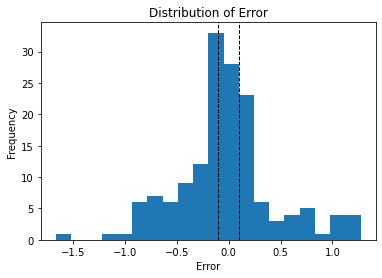

-0.026623376623376608
Statistic: 2.956
15.000: 0.562, data does not look normal (reject H0)
10.000: 0.640, data does not look normal (reject H0)
5.000: 0.768, data does not look normal (reject H0)
2.500: 0.896, data does not look normal (reject H0)
1.000: 1.065, data does not look normal (reject H0)


In [33]:
model=model_Reg_WC
df_test_ref=df_test[XX.columns]
y_pred = model.predict(df_test_ref)
y_pred= pd.DataFrame(y_pred)
df_test['output']=y_pred
from sklearn.metrics import mean_absolute_error as MAE
output=df_test['output']
mae_var = MAE(variable, output)
print('Result (Test)')
print("MAE : %.5f" %(mae_var))
import matplotlib.pyplot as plt
result = pd.DataFrame()
result['Y_True'] = variable
result['Y_Pred'] = output
result['Error'] = (result['Y_True'] - result['Y_Pred']).round(2)
plt.hist(result['Error'], bins=20)
plt.axvline(0.1, color='k', linestyle='dashed', linewidth=1)
plt.axvline(-0.1, color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
print(mean(result['Error']))
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# normality test
result = anderson(result['Error'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < result.critical_values[i]:
     print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
 else:
     print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

### HYPERPARAMETER TUNING

In [50]:
XX_CPI=['1OYSum of kapalı', '1OYMax of DEVIR', '2AYMax of DEVIR',
       '2AYSum of ALT_C', '4SGDSum of ALT_C', '7SCD2Max of DEVIR',
       '7SCD2Sum of ÜST_C', '10KUSum of SURE', '10KUSum of KAPI ACMA']
XX_DPI=['1OYMax of TEMP', '1OYSum of BEKLEME', '2AYSum of ALT_C',
       '2AYSum of TEPE_C', '4SGDSum of TEPE_C', '7SCD2Sum of ALT_C',
       '8DSBMax of DEVIR', '10KUSum of SURE', '10KUSum of GAUDI_offset']

### hyperparameter tuning of CPI

In [61]:
X = df_ver_3
y = y_CPI

In [62]:
XX=df_ver_3[XX_CPI]
y=y_CPI

In [63]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer
from pprint import pprint
from sklearn.metrics import mean_pinball_loss

param_grid = dict(
    learning_rate=[0.05, 0.1, 0.2],
    max_depth=[2, 5, 10],
    min_samples_leaf=[1, 5, 10, 20],
    min_samples_split=[5, 10, 20, 30, 50],
)
alpha = 0.05
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(XX, y)
pprint(search_05p.best_params_)

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}


In [64]:
model=GradientBoostingRegressor(learning_rate= 0.1, max_depth= 10, min_samples_leaf= 5,
                                        min_samples_split= 10, n_estimators= 150)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.067 76.223


In [65]:
model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 0.048 84.666


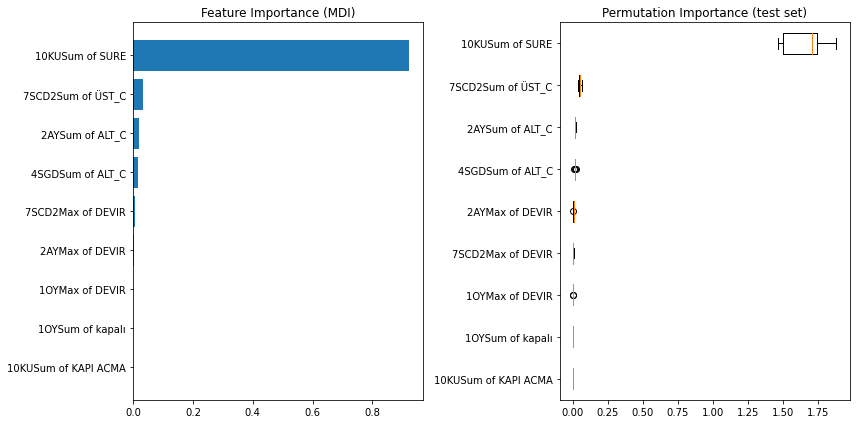

In [49]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(XX.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, XX, y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(XX.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### hyperparameter tuning of DPI

In [138]:
XX=df_ver_3[XX_DPI]
y=y_DPI

In [139]:
param_grid = dict(
    learning_rate=[0.05, 0.1, 0.2],
    max_depth=[2, 5, 10],
    min_samples_leaf=[1, 5, 10, 20],
    min_samples_split=[5, 10, 20, 30, 50],
)
alpha = 0.05
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(df_ver_3, y)
pprint(search_05p.best_params_)

{'learning_rate': 0.2,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}


In [143]:
model=GradientBoostingRegressor(learning_rate= 0.2, max_depth= 10, min_samples_leaf= 1,
                                        min_samples_split= 5, n_estimators= 150)
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.226 80.581


In [142]:
model=GradientBoostingRegressor()
model.fit(XX, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
scores1 = cross_val_score(model,XX, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model,XX, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.3f' % (-mean(scores1),  100*mean(scores3)))

 2.134 83.590


since we can not see any improvement we do not report the hyperparameter tuning 